In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from scipy.signal import butter, lfilter, freqz
from scipy import signal

NOISE_SIZE = 0
ECHO_SIZE = 2048
THRESHOLD = 0.15

def check_data_points(filename):
    data_frame = pd.read_csv(filename, skiprows=[0], header= None)
    required_data = data_frame.iloc[:, 9:]
    return required_data

def get_time_domain_data_without_offset(data_frame):
    time_domain_data_without_offset = data_frame.sub(data_frame.mean(axis=1), axis=0).values
    return time_domain_data_without_offset

def peak_value(data):
    max_point_distance = 0
    peakData = 0
    max_point_distance = np.array(data).argmax()
    peakData = np.array(data).max()
    if peakData > THRESHOLD:
        return max_point_distance
    else: 
        return None
    
def get_echos(filtered_values):
    all_echo_range = [] 
    for index, data in enumerate(filtered_values):
        chopped_data = data[NOISE_SIZE:]
        max_point_distance = peak_value(chopped_data)
        if max_point_distance:
            cutting_distance = max_point_distance - 512
            if cutting_distance > 0:
                echo_range = chopped_data[cutting_distance:]
                echo_range = echo_range[:ECHO_SIZE]
                all_echo_range.append(echo_range)
    return all_echo_range

def plot_graphs(data):
    fig = plt.figure(figsize=(30, 20))
    for index, data in enumerate(data):
        if index < 15:
            ax = fig.add_subplot(4,4, index+1)
            ax.plot(data)
            
# def save_to_csv(echo_set, folder, file):
#     data = pd.DataFrame(echo_set)
# #     df = data.drop([1,273,365,410,629,659,671,685])
# #     print(df.shape)
#     data.to_csv('../Documents/data_set/New_Data_Set/1.14MHz Data/Result/{}/{}_overall.csv'.format(folder, file), header=False, index=False)
# #     df.to_csv('../Documents/data_set/New_Data_Set/1.14MHz Data/Result/{}/{}_overall.csv'.format(folder, file), header=False, index=False)
#     print(folder, file)

In [6]:
#Import files

file_set=[1]
# distance_set=[80,90,100,110,120,130,140,150]
distance_set=[100]
folder_set=['pillar']

data_with_offset=[]
for i, folder_name in enumerate(folder_set):
    main_folder_name = folder_set[i]
    
    for distance in (distance_set):
        for file_number in file_set:
            filename= '../Documents/data_set/New_Data_Set/1.14MHz Data/{}/{}/{}.csv'.format(main_folder_name, distance, file_number)
            required_data_with_offset = check_data_points(filename)
            data_with_offset.append(required_data_with_offset)
            print(filename, required_data_with_offset.shape)

../Documents/data_set/New_Data_Set/1.14MHz Data/pillar/100/1.csv (732, 5714)


[ 732 5714]


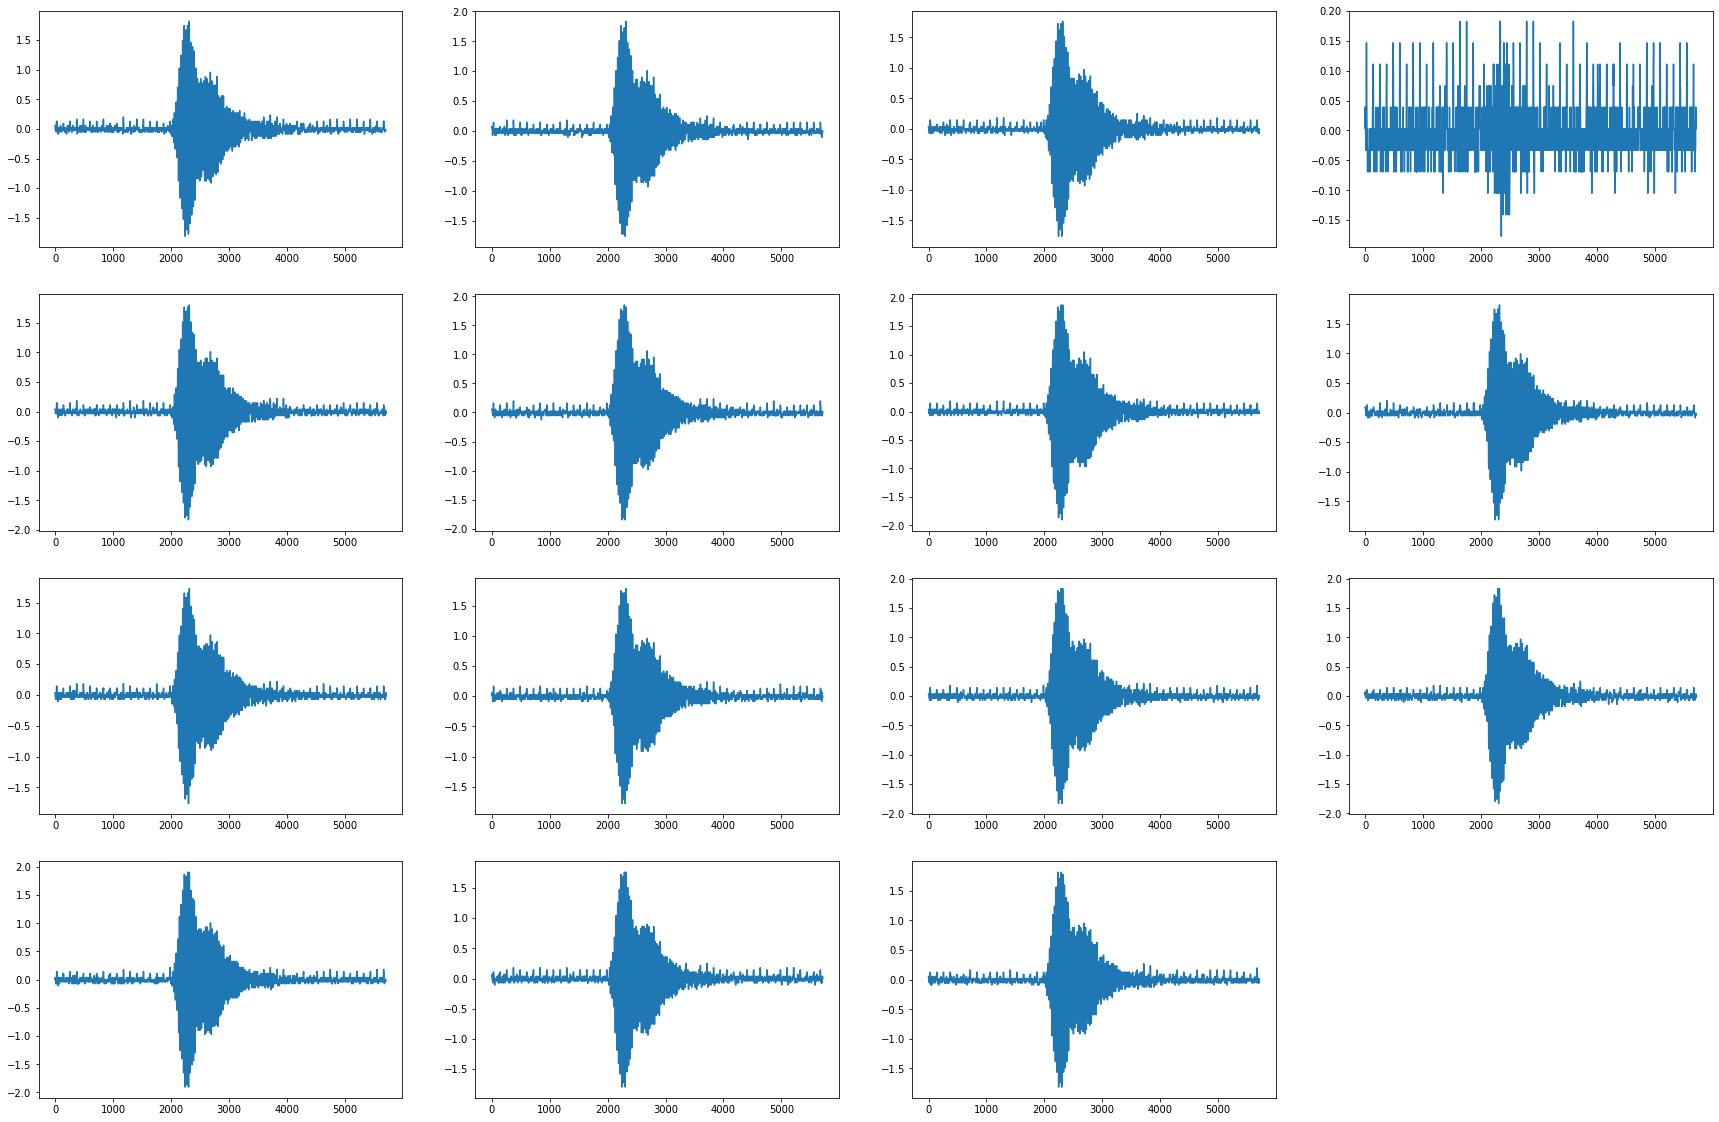

In [7]:
data_without_offset = []
for i, data in enumerate(data_with_offset):
    required_data_without_offset = get_time_domain_data_without_offset(data)
    data_without_offset.append(required_data_without_offset)
    print(np.array(required_data_without_offset.shape))
    plot_graphs(required_data_without_offset)

(730, 2048)


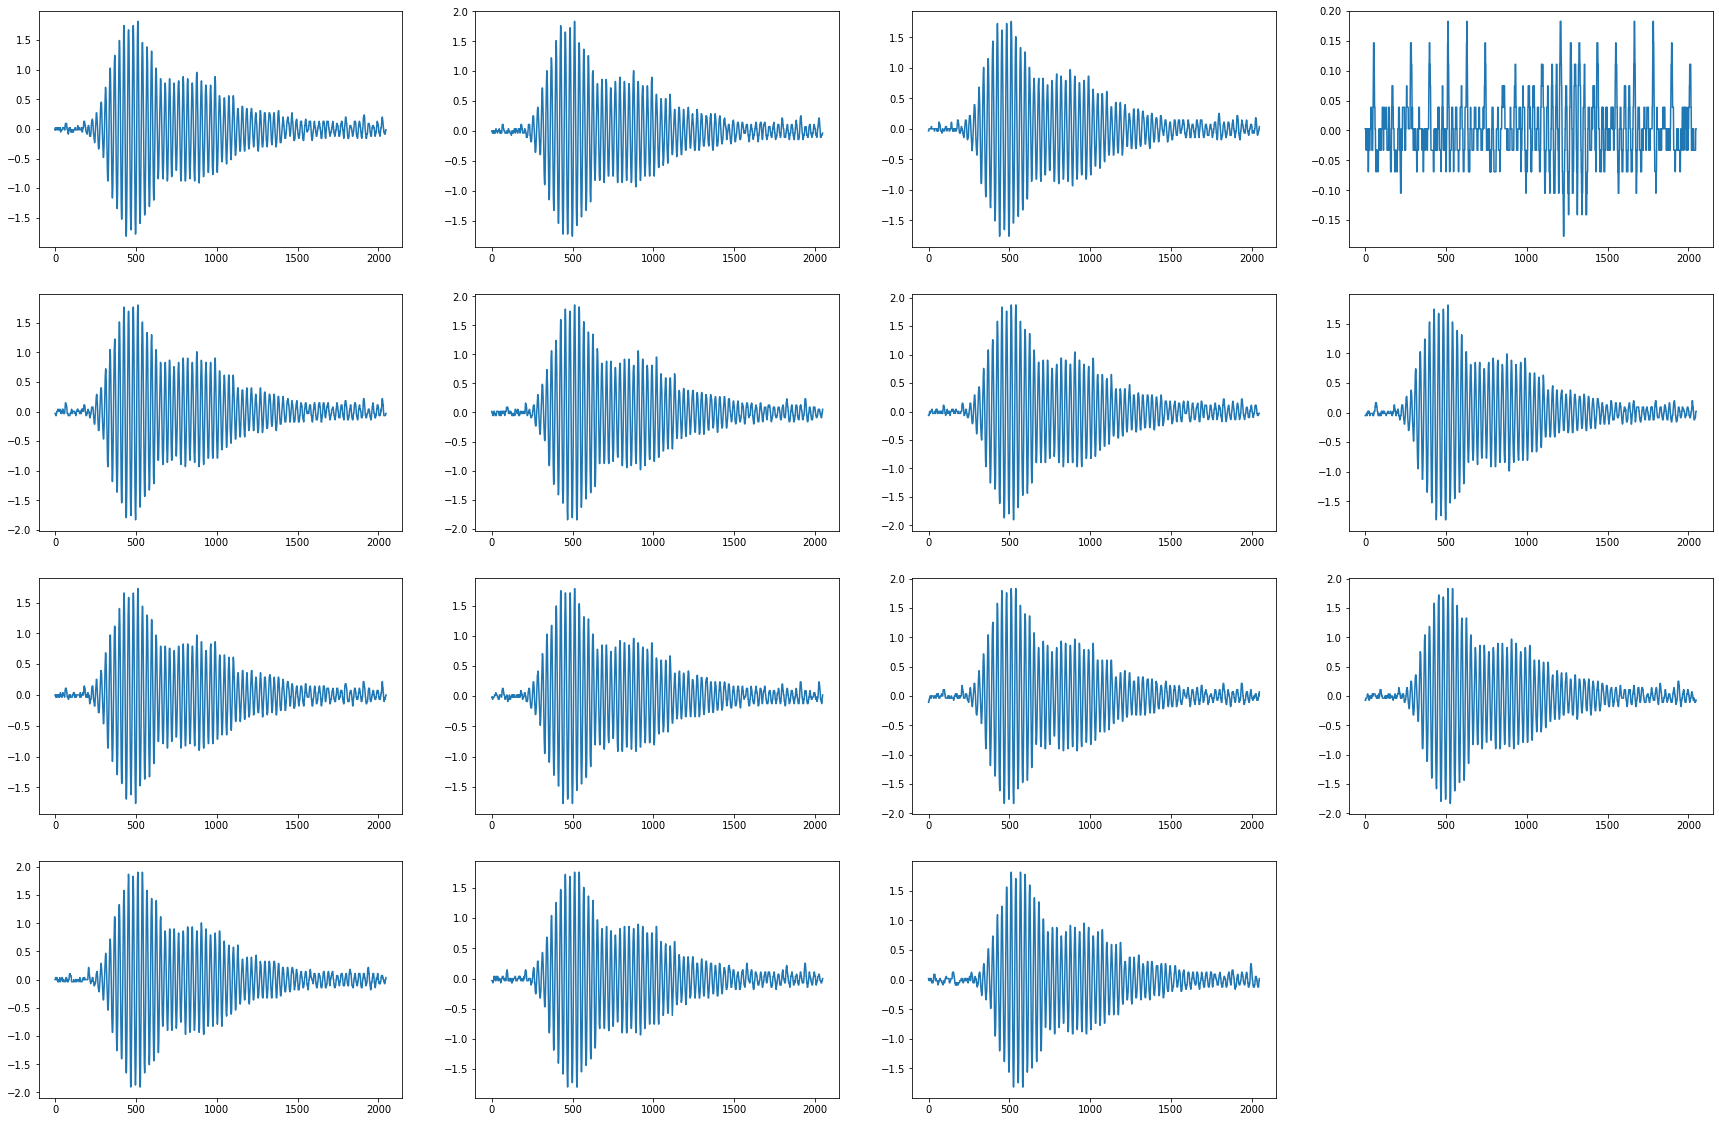

In [8]:
required_echos_set = []
for i, data in enumerate(data_without_offset):
    required_echos = get_echos(data)
    required_echos_set.append(required_echos)
    print(np.array(required_echos).shape)
    plot_graphs(required_echos)

In [58]:
#save to csv files

file_set=[1]
distance_set = [80,90,100,110,120,130,140,150]
folder_set=['Wall']

for i, folder_name in enumerate(folder_set):
    main_folder_name = folder_set[i]
    
    for distance in distance_set:
        echo_set = []
        for file_number in file_set:
            filename= '../Documents/data_set/New_Data_Set/1.14MHz Data/{}/{}/{}.csv'.format(main_folder_name, distance, file_number)
            print(filename)
            data_with_offset = check_data_points(filename)
            data_without_offset = get_time_domain_data_without_offset(data_with_offset)
            echos_data =  get_echos(data_without_offset)
            echo_set = echo_set + echos_data
#             print("Echo set:", np.array(echo_set).shape)
#             print(np.array(echo_set).shape, main_folder_name, distance)
#             save_to_csv(echo_set, main_folder_name, distance)

../Documents/data_set/New_Data_Set/1.14MHz Data/Wall/80/1.csv
Wall 80
../Documents/data_set/New_Data_Set/1.14MHz Data/Wall/90/1.csv
Wall 90
../Documents/data_set/New_Data_Set/1.14MHz Data/Wall/100/1.csv
Wall 100
../Documents/data_set/New_Data_Set/1.14MHz Data/Wall/110/1.csv
Wall 110
../Documents/data_set/New_Data_Set/1.14MHz Data/Wall/120/1.csv
Wall 120
../Documents/data_set/New_Data_Set/1.14MHz Data/Wall/130/1.csv
Wall 130
../Documents/data_set/New_Data_Set/1.14MHz Data/Wall/140/1.csv
Wall 140
../Documents/data_set/New_Data_Set/1.14MHz Data/Wall/150/1.csv
Wall 150
